In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

Load Data 

In [5]:
data = pd.read_csv("D:\DML\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.shape

(768, 9)

In [13]:
print(data["Outcome"].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot: >

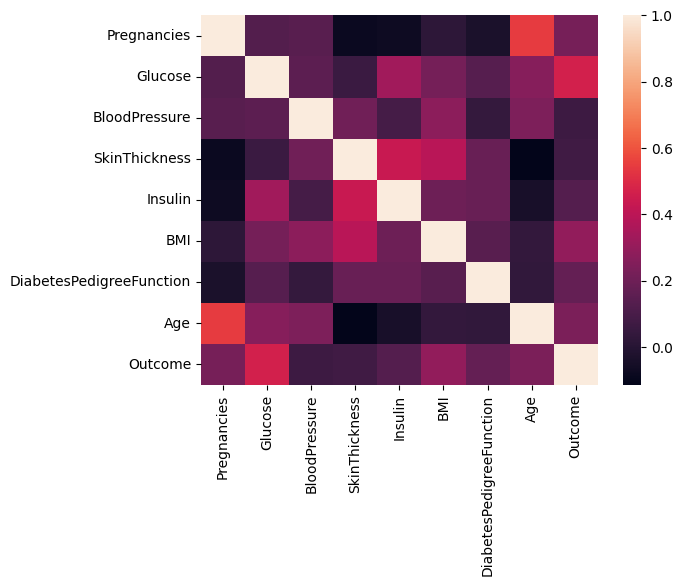

In [55]:
sns.heatmap(data = data.corr())

In [21]:
figure = px.pie(data_frame=data, names=["No Diabetes","Diabetes"], values=data["Outcome"].value_counts())
figure.show()

 Prediction Model 

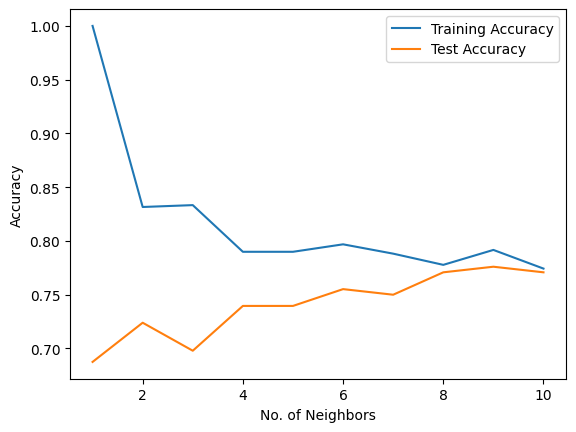

In [43]:
Xtrain,Xtest,ytrain,ytest = train_test_split(data.loc[:,data.columns != 'Outcome'], data["Outcome"], stratify=data['Outcome'], random_state=66)

trainingAccuracy = []
testAccuracy = []

neighborsSettings = range(1,11)

for Nneighbors in neighborsSettings:
    knn = KNeighborsClassifier(n_neighbors=Nneighbors)
    knn.fit(Xtrain,ytrain)
    trainingAccuracy.append(knn.score(Xtrain,ytrain))
    testAccuracy.append(knn.score(Xtest,ytest))
plt.plot(neighborsSettings, trainingAccuracy, label = "Training Accuracy")
plt.plot(neighborsSettings, testAccuracy, label = "Test Accuracy")
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [44]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain,ytrain)
training = knn.score(Xtrain,ytrain)
testing = knn.score(Xtest,ytest)
print('Training Accuracy: {:.2f}'.format(training * 100),"%")
print("Testing Accuracy :{:.2f} ".format(testing * 100),"%")

Training Accuracy: 79.17 %
Testing Accuracy :77.60  %


## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth = 3,random_state=0)
dc.fit(Xtrain,ytrain)
training = dc.score(Xtrain,ytrain)
testing = dc.score(Xtest,ytest)
print('Training Accuracy:{:.2f} '.format(training * 100),"%")
print("Testing Accuracy :{:.2f} ".format(testing * 100),"%")

Training Accuracy:77.26  %
Testing Accuracy :73.96  %


In [57]:
# features = [[Pregnant,Glucose,BP,ST,Insulin,BMI,DPF,Age]]
features = np.array([[1,85,66,29,0,26.6,0.351,31]])
DiabetesPredictor = dc.predict(features)
if DiabetesPredictor == 0:
    print("No Diabetes")
else:
    print("Diabetes")

No Diabetes


c:\Users\orion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

